<a href="https://colab.research.google.com/github/salauddinkhan1986/predict-youtube-videos-likes/blob/main/Predict_youtube_video_likes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA**

**Loading Libary**

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading dataset**

In [159]:

data = pd.read_parquet('/content/test.parquet')
data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,isTest
0,_wNsZEqpKUA,"Billie Eilish: Same Interview, The Fifth Year ...",2021-11-30 17:00:10+00:00,UCIsbLox_y9dCIMLd8tdC6qg,Vanity Fair,24,2021-12-01,billie|billie eilish|billie eilish 2021|billie...,https://i.ytimg.com/vi/_wNsZEqpKUA/default.jpg,False,False,I'm so much more open to stuff now. On the ver...,_wNsZEqpKUA_2021-12-01,1335.0,True,True
1,2jfbXZiE6Lc,Redneck vs Fancy Whiskey Glass,2021-11-29 21:30:27+00:00,UCT_QEGH0myu6lgbE_biQPuw,Drew Talbert,23,2021-12-01,[None],https://i.ytimg.com/vi/2jfbXZiE6Lc/default.jpg,False,False,I’m just shocked Brad was able to sell him in ...,2jfbXZiE6Lc_2021-12-01,28.0,True,True
2,F1Hq8eVOMHs,Is Meat Really that Bad?,2021-11-30 15:01:34+00:00,UCsXVk37bltHxD1rDPwtNM8Q,Kurzgesagt – In a Nutshell,27,2021-12-01,[None],https://i.ytimg.com/vi/F1Hq8eVOMHs/default.jpg,False,False,"The first 1,000 people to use this link will g...",F1Hq8eVOMHs_2021-12-01,728.0,True,True
3,GQXVQmcGQUY,Things Get Strange With The UnderTaker | Cold ...,2021-11-30 16:00:27+00:00,UCLRmIdRJgLfmdpJufmBhBuA,LOL Network,23,2021-12-01,kevin hart|hartbeat productions|funny|comedy|c...,https://i.ytimg.com/vi/GQXVQmcGQUY/default.jpg,False,False,#PoweredByOldSpice Thought by many as one of t...,GQXVQmcGQUY_2021-12-01,829.0,True,True
4,n4XojTb6pfs,People Pleasers at a Restaurant,2021-11-30 17:15:02+00:00,UCT_QEGH0myu6lgbE_biQPuw,Drew Talbert,23,2021-12-01,[None],https://i.ytimg.com/vi/n4XojTb6pfs/default.jpg,False,False,I apologize for existing - please throw me out...,n4XojTb6pfs_2021-12-01,31.0,True,True


In [160]:
data.shape

(5800, 16)

In [161]:
data.describe()

,categoryId,duration_seconds
count,5800.000000,5780.000000
mean,19.196897,641.144118
std,6.708874,732.952170
min,1.000000,10.000000
25%,17.000000,113.000000
50%,22.000000,443.500000
75%,24.000000,911.000000
max,28.000000,8250.000000


In [162]:
data.apply(lambda x: len(x.unique()))

video_id             1362
title                1405
publishedAt          1347
channelId             922
channelTitle          925
categoryId             13
trending_date          29
tags                  976
thumbnail_link       1362
comments_disabled       2
ratings_disabled        2
description          1277
id                   5800
duration_seconds      787
has_thumbnail           2
isTest                  1
dtype: int64

In [163]:
data.nunique()

video_id             1362
title                1405
publishedAt          1347
channelId             922
channelTitle          925
categoryId             13
trending_date          29
tags                  976
thumbnail_link       1362
comments_disabled       2
ratings_disabled        2
description          1276
id                   5800
duration_seconds      786
has_thumbnail           2
isTest                  1
dtype: int64

**Data visualization**

False    5760
True       40
Name: comments_disabled, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


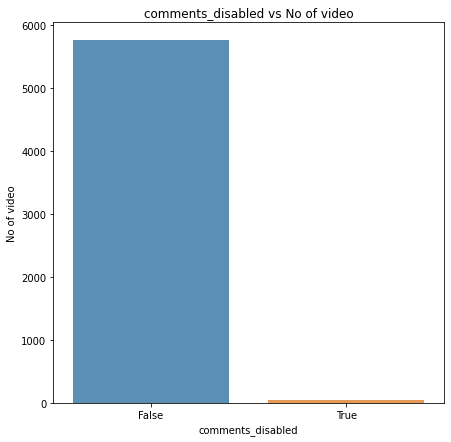

False    5582
True      218
Name: ratings_disabled, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


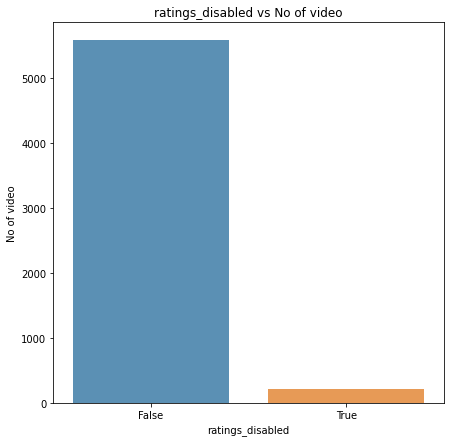

In [164]:
for x in (['comments_disabled','ratings_disabled']):
    count= data[x].value_counts()
    print(count)
    plt.figure(figsize=(7,7))
    sns.barplot(count.index, count.values, alpha=0.8)
    plt.title('{} vs No of video'.format(x))
    plt.ylabel('No of video')
    plt.xlabel('{}'.format(x))
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


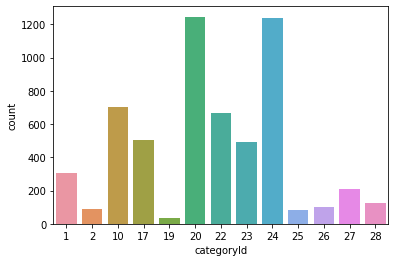

In [165]:
sns.countplot('categoryId',data=data)

**Correlation Matrix**

In [166]:
data_correlation = data.corr()
data_correlation

,categoryId,comments_disabled,ratings_disabled,duration_seconds,has_thumbnail,isTest
categoryId,1.000000,0.014324,0.004199,0.081054,-0.022636,NaN
comments_disabled,0.014324,1.000000,0.147838,0.100472,0.000428,NaN
ratings_disabled,0.004199,0.147838,1.000000,-0.020053,0.018422,NaN
duration_seconds,0.081054,0.100472,-0.020053,1.000000,0.043432,NaN
has_thumbnail,-0.022636,0.000428,0.018422,0.043432,1.000000,NaN
isTest,NaN,NaN,NaN,NaN,NaN,NaN


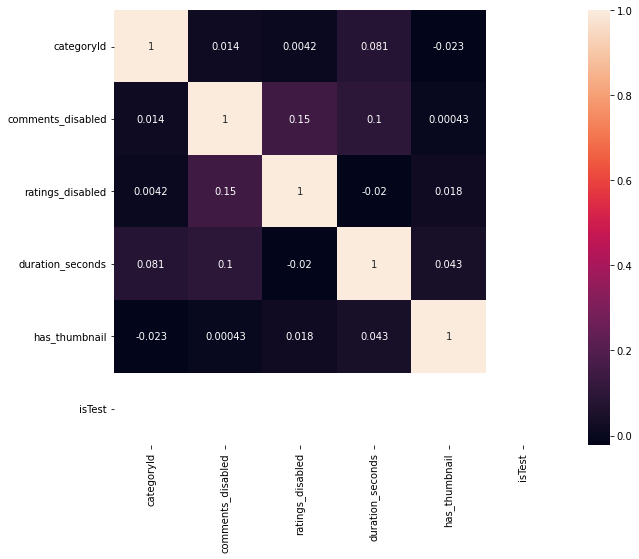

In [167]:
plt.figure(figsize = (10,8))
sns.heatmap(data_correlation, annot=True)

**checking missing values**

In [168]:
missing_value = data.isna().sum()
missing_value

video_id               0
title                  0
publishedAt            0
channelId              0
channelTitle           0
categoryId             0
trending_date          0
tags                   0
thumbnail_link         0
comments_disabled      0
ratings_disabled       0
description          409
id                     0
duration_seconds      20
has_thumbnail          0
isTest                 0
dtype: int64

In [169]:
data = data.dropna()

In [170]:
missing_value = data.isna().sum()
missing_value

video_id             0
title                0
publishedAt          0
channelId            0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
description          0
id                   0
duration_seconds     0
has_thumbnail        0
isTest               0
dtype: int64

**Reading data**

In [171]:
from pandas.io.parquet import read_parquet
train_data = pd.read_parquet('/content/train.parquet')
train_data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,3C66w5Z0ixs_2020-08-12,NaN,True,0.103596
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",M9Pmf9AB4Mo_2020-08-12,NaN,True,0.061611
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,J78aPJ3VyNs_2020-08-12,NaN,True,0.173523
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,kXLn3HkpjaA_2020-08-12,NaN,True,0.046804
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,VIUo6yapDbc_2020-08-12,NaN,True,0.040753


**Label Encoding (changing categorical values into numerical values)**

In [172]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(data['video_id'])
data['video_id'] = label_encoder.transform(data['video_id'])

In [173]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(data['title'])
data['title'] = label_encoder.transform(data['title'])

In [174]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(data['publishedAt'])
data['publishedAt'] = label_encoder.transform(data['publishedAt'])

In [175]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(data['channelId'])
data['channelId'] = label_encoder.transform(data['channelId'])

In [176]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(data['channelTitle'])
data['channelTitle'] = label_encoder.transform(data['channelTitle'])

In [177]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(data['tags'])
data['tags'] = label_encoder.transform(data['tags'])

In [178]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(data['thumbnail_link'])
data['thumbnail_link'] = label_encoder.transform(data['thumbnail_link'])

In [179]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(data['comments_disabled'])
data['comments_disabled'] = label_encoder.transform(data['comments_disabled'])

In [180]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(data['ratings_disabled'])
data['ratings_disabled'] = label_encoder.transform(data['ratings_disabled'])

In [181]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(data['description'])
data['description'] = label_encoder.transform(data['description'])

In [182]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(data['id'])
data['id'] = label_encoder.transform(data['id'])

In [183]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(data['duration_seconds'])
data['duration_seconds'] = label_encoder.transform(data['duration_seconds'])

In [184]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(data['has_thumbnail'])
data['has_thumbnail'] = label_encoder.transform(data['has_thumbnail'])

In [185]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(data['trending_date'])
data['trending_date'] = label_encoder.transform(data['trending_date'])

In [186]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(data['isTest'])
data['isTest'] = label_encoder.transform(data['isTest'])

In [187]:
data.describe()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,isTest
count,5375.000000,5375.000000,5375.000000,5375.000000,5375.000000,5375.000000,5375.000000,5375.000000,5375.000000,5375.000000,5375.000000,5375.000000,5375.000000,5375.000000,5375.000000,5375.0
mean,615.765953,649.199814,687.920372,425.624744,432.425302,19.013953,13.958884,470.668651,615.765953,0.006884,0.036279,632.659721,2687.000000,322.741395,0.901767,0.0
std,356.179890,369.704201,327.219095,247.879898,242.295210,6.755471,8.392071,250.216390,356.179890,0.082690,0.187001,369.003348,1551.773179,233.203053,0.297657,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,308.000000,332.000000,407.000000,201.500000,228.000000,17.000000,7.000000,311.000000,308.000000,0.000000,0.000000,309.000000,1343.500000,110.000000,1.000000,0.0
50%,613.000000,647.000000,733.000000,427.000000,443.000000,20.000000,14.000000,402.000000,613.000000,0.000000,0.000000,638.000000,2687.000000,292.000000,1.000000,0.0
75%,917.000000,969.000000,975.000000,642.000000,633.000000,24.000000,21.000000,668.000000,917.000000,0.000000,0.000000,949.000000,4030.500000,519.000000,1.000000,0.0
max,1250.000000,1293.000000,1235.000000,851.000000,854.000000,28.000000,28.000000,960.000000,1250.000000,1.000000,1.000000,1271.000000,5374.000000,778.000000,1.000000,0.0


In [188]:
data.dtypes

video_id             int64
title                int64
publishedAt          int64
channelId            int64
channelTitle         int64
categoryId           int64
trending_date        int64
tags                 int64
thumbnail_link       int64
comments_disabled    int64
ratings_disabled     int64
description          int64
id                   int64
duration_seconds     int64
has_thumbnail        int64
isTest               int64
dtype: object

In [189]:
train_data.describe()

,categoryId,view_count,likes,dislikes,comment_count,duration_seconds,target
count,92275.000000,9.227500e+04,9.227500e+04,92275.000000,9.227500e+04,90099.000000,92275.000000
mean,18.733416,2.779091e+06,1.521223e+05,3110.977307,1.373574e+04,760.614602,0.057060
std,6.866404,7.364113e+06,4.374777e+05,13342.743386,9.672682e+04,5816.818926,0.040373
min,1.000000,3.851000e+04,0.000000e+00,0.000000,0.000000e+00,3.000000,0.000000
25%,17.000000,5.312440e+05,2.136300e+04,368.000000,1.692000e+03,184.000000,0.028066
50%,20.000000,1.100045e+06,5.169200e+04,852.000000,3.856000e+03,446.000000,0.050784
75%,24.000000,2.482274e+06,1.312825e+05,2239.000000,9.322000e+03,854.000000,0.075265
max,29.000000,2.644074e+08,1.602153e+07,879354.000000,6.738537e+06,485620.000000,0.433503


**Checking missing values**

In [190]:
miss_val = train_data.isna().sum()
miss_val

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          1476
id                      0
duration_seconds     2176
has_thumbnail           0
target                  0
dtype: int64

In [191]:
train_data = train_data.dropna()

In [192]:
miss_val = train_data.isna().sum()
miss_val

video_id             0
title                0
publishedAt          0
channelId            0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
description          0
id                   0
duration_seconds     0
has_thumbnail        0
target               0
dtype: int64

**Cheking correlation**

In [193]:
data_correlation = train_data.corr()
data_correlation

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,duration_seconds,has_thumbnail,target
categoryId,1.000000,-0.060235,-0.088672,-0.047968,-0.063661,0.093193,0.015578,0.043006,-0.005579,-0.101196
view_count,-0.060235,1.000000,0.855172,0.698304,0.552851,-0.002041,0.018585,0.056385,-0.001006,-0.018430
likes,-0.088672,0.855172,1.000000,0.666642,0.725644,-0.026284,-0.023514,-0.010215,-0.003366,0.202934
dislikes,-0.047968,0.698304,0.666642,1.000000,0.544269,0.007627,-0.015522,0.022831,-0.012424,0.006248
comment_count,-0.063661,0.552851,0.725644,0.544269,1.000000,-0.017655,-0.005844,-0.006207,-0.008897,0.081240
comments_disabled,0.093193,-0.002041,-0.026284,0.007627,-0.017655,1.000000,0.179925,0.023627,-0.003710,-0.085706
ratings_disabled,0.015578,0.018585,-0.023514,-0.015522,-0.005844,0.179925,1.000000,-0.001674,0.003991,-0.096604
duration_seconds,0.043006,0.056385,-0.010215,0.022831,-0.006207,0.023627,-0.001674,1.000000,0.004935,-0.035559
has_thumbnail,-0.005579,-0.001006,-0.003366,-0.012424,-0.008897,-0.003710,0.003991,0.004935,1.000000,0.009836
target,-0.101196,-0.018430,0.202934,0.006248,0.081240,-0.085706,-0.096604,-0.035559,0.009836,1.000000


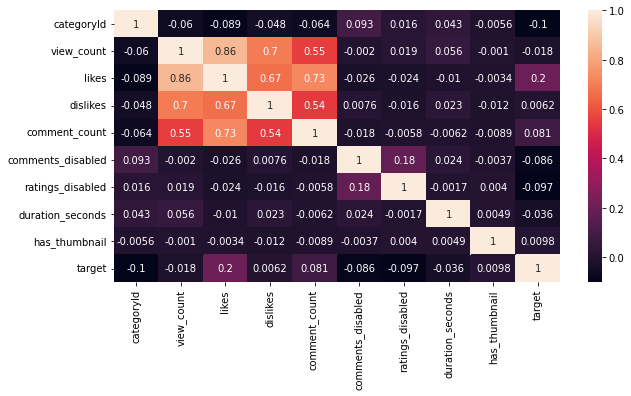

In [194]:
plt.figure(figsize=(10,5))
sns.heatmap(data_correlation, annot=True)

In [195]:
train_data.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'id', 'duration_seconds',
       'has_thumbnail', 'target'],
      dtype='object')

**Data visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


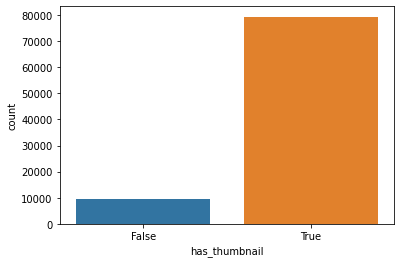

In [196]:
sns.countplot('has_thumbnail',data=train_data)
plt.show()

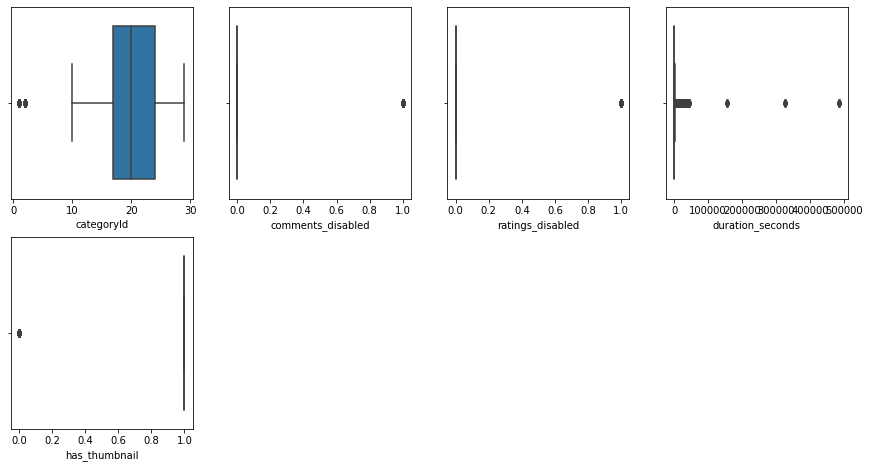

In [197]:
plt.figure(figsize=(15,12))
plt.subplot(3,4,1)
sns.boxplot(x=train_data['categoryId'])
plt.subplot(3,4,2)
sns.boxplot(x=train_data['comments_disabled'])
plt.subplot(3,4,3)
sns.boxplot(x=train_data['ratings_disabled'])
plt.subplot(3,4,4)
sns.boxplot(x=train_data['duration_seconds'])
plt.subplot(3,4,5)
sns.boxplot(x=train_data['has_thumbnail'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


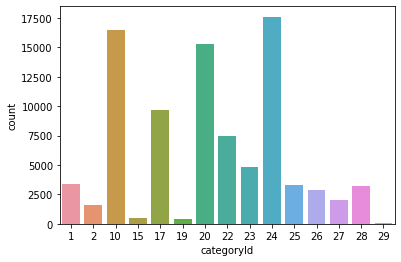

In [198]:
sns.countplot('categoryId',data=train_data)
plt.show()

In [199]:
data.shape

(5375, 16)

In [200]:
data.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'description', 'id',
       'duration_seconds', 'has_thumbnail', 'isTest'],
      dtype='object')

**Label Encoding (changing categorical values into numerical values**

In [231]:
train_x=train_data.drop(['view_count', 'likes',
       'dislikes', 'comment_count','publishedAt'],axis=1)
train_y=train_data['likes']


In [230]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(train_x['title'])
train_data['title'] = label_encoder.transform(train_x['title'])

In [233]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(train_x['video_id'])
train_data['video_id'] = label_encoder.transform(train_x['video_id'])

In [234]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(train_x['channelId'])
train_data['channelId'] = label_encoder.transform(train_x['channelId'])

In [235]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(train_x['channelTitle'])
train_data['channelTitle'] = label_encoder.transform(train_x['channelTitle'])

In [236]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(train_x['tags'])
train_data['tags'] = label_encoder.transform(train_x['tags'])

In [237]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(train_x['thumbnail_link'])
train_data['thumbnail_link'] = label_encoder.transform(train_x['thumbnail_link'])

In [238]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(train_x['description'])
train_data['description'] = label_encoder.transform(train_x['description'])

In [239]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(train_x['id'])
train_data['id'] = label_encoder.transform(train_x['id'])

In [240]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(train_x['trending_date'])
train_data['trending_date'] = label_encoder.transform(train_x['trending_date'])

In [241]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(train_x['ratings_disabled'])
train_data['ratings_disabled'] = label_encoder.transform(train_x['ratings_disabled'])

In [242]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(train_x['comments_disabled'])
train_data['comments_disabled'] = label_encoder.transform(train_x['comments_disabled'])

In [243]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(train_x['has_thumbnail'])
train_data['has_thumbnail'] = label_encoder.transform(train_x['has_thumbnail'])

In [244]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(train_x['target'])
train_data['target'] = label_encoder.transform(train_x['target'])

In [245]:
train_x.dtypes

video_id               int64
title                  int64
channelId              int64
channelTitle           int64
categoryId             int64
trending_date          int64
tags                   int64
thumbnail_link         int64
comments_disabled      int64
ratings_disabled       int64
description            int64
id                     int64
duration_seconds     float64
has_thumbnail          int64
target                 int64
dtype: object

**dividng and splitting data**

In [216]:
data.shape

(5375, 16)

In [217]:
train_x.shape

(88685, 15)

In [218]:
train_x.head()

,video_id,title,channelId,channelTitle,categoryId,trending_date,tags,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
40,n_8hxS_7Vis,Shannon reacts to Kyle Kuzma's game-winning sh...,UCLXzq85ijg2LwJWFrz4pkmw,Skip and Shannon: UNDISPUTED,17,2020-08-12,fox|fox sports|fs1|fox sports 1|undisputed|ski...,https://i.ytimg.com/vi/n_8hxS_7Vis/default.jpg,False,False,LeBron and the Lakers finally snapped their 3-...,n_8hxS_7Vis_2020-08-12,1112.0,True,0.013235
41,OQZ5ht79nEw,Answering Your Assumptions About Us... Merrell...,UCwtnkRZcvL4bfopzJ-Von8Q,merrelltwins,23,2020-08-12,Merrell Twins|Twins|Merrell|Veronica Merrell|V...,https://i.ytimg.com/vi/OQZ5ht79nEw/default.jpg,False,False,We answered your assumptions about us...Go to ...,OQZ5ht79nEw_2020-08-12,1083.0,True,0.087630
42,zHPVGSwLhcg,Unboxing Apple's $129 Luxury Cable,UCsTcErHg8oDvUnTzoqsYeNw,Unbox Therapy,28,2020-08-12,unbox therapy|unboxtherapy|tech|technology|gad...,https://i.ytimg.com/vi/zHPVGSwLhcg/default.jpg,False,False,ShhhhFOLLOW ME IN THESE PLACES FOR UPDATES\rTw...,zHPVGSwLhcg_2020-08-12,438.0,False,0.061170
43,gi3VMMiFHVg,Giannis Gets Ejected After Headbutting Mo Wagner,UC9-OpMMVoNP5o10_Iyq7Ndw,Bleacher Report,17,2020-08-12,bleacher report|br|nba|giannis|giannis antetok...,https://i.ytimg.com/vi/gi3VMMiFHVg/default.jpg,False,False,"In a random and wild sequence of events, Giann...",gi3VMMiFHVg_2020-08-12,164.0,False,0.010938
44,p6RatnMhDj8,I TOOK A PREGNANCY TEST...,UCpGCAsPlArOj9ptyCszxOOg,ValeYas Vlogs,22,2020-08-12,valeyas|vlogs|daily vlogs|beautyybird|pregnanc...,https://i.ytimg.com/vi/p6RatnMhDj8/default.jpg,False,False,▷SUBSCRIBE FOR DAILY VLOGS: http://bit.ly/2lFI...,p6RatnMhDj8_2020-08-12,1572.0,False,0.050031


In [219]:
train_data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
40,13127,12062,2020-08-11 16:21:47+00:00,1577,3261,17,0,7871,540613,7155,308,1647,13127,0,0,7186,71463,1112.0,1,8760
41,6505,1144,2020-08-11 17:29:52+00:00,4147,4301,23,0,3097,430836,37754,256,4818,6505,0,0,15047,35256,1083.0,1,73031
42,16071,14562,2020-08-11 14:42:43+00:00,3838,3860,28,0,11953,997102,60993,8847,13810,16071,0,0,10680,87723,438.0,0,54543
43,11348,5031,2020-08-12 02:30:32+00:00,693,454,17,0,6172,756814,8278,331,2441,11348,0,0,6017,61732,164.0,0,6213
44,13523,6514,2020-08-11 02:40:01+00:00,3596,3900,22,0,12015,143091,7159,349,805,13523,0,0,16922,73576,1572.0,0,43055


In [220]:
train_data['video_id'].nunique()

16248

In [221]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88685 entries, 40 to 92274
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   video_id           88685 non-null  int64              
 1   title              88685 non-null  int64              
 2   publishedAt        88685 non-null  datetime64[ns, UTC]
 3   channelId          88685 non-null  int64              
 4   channelTitle       88685 non-null  int64              
 5   categoryId         88685 non-null  int64              
 6   trending_date      88685 non-null  int64              
 7   tags               88685 non-null  int64              
 8   view_count         88685 non-null  int64              
 9   likes              88685 non-null  int64              
 10  dislikes           88685 non-null  int64              
 11  comment_count      88685 non-null  int64              
 12  thumbnail_link     88685 non-null  int64     

In [222]:
train_data.nunique()

video_id             16248
title                16587
publishedAt          15976
channelId             4343
channelTitle          4407
categoryId              15
trending_date          461
tags                 12541
view_count           87424
likes                69661
dislikes             12377
comment_count        25211
thumbnail_link       16248
comments_disabled        2
ratings_disabled         2
description          17260
id                   88685
duration_seconds      2326
has_thumbnail            2
target               88274
dtype: int64

In [223]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
video_id,88685.0,8.153852e+03,4.693857e+03,0.0,4096.0,8165.0,12217.0,16247.0
title,88685.0,8.288449e+03,4.788454e+03,0.0,4170.0,8262.0,12435.0,16586.0
channelId,88685.0,2.173027e+03,1.260877e+03,0.0,1072.0,2155.0,3317.0,4342.0
channelTitle,88685.0,2.229862e+03,1.263827e+03,0.0,1101.0,2309.0,3291.0,4406.0
categoryId,88685.0,1.869132e+01,6.872608e+00,1.0,17.0,20.0,24.0,29.0
trending_date,88685.0,2.304114e+02,1.325001e+02,0.0,116.0,231.0,345.0,460.0
tags,88685.0,6.226258e+03,3.388333e+03,0.0,3702.0,5444.0,9001.0,12540.0
view_count,88685.0,2.757380e+06,7.323528e+06,38510.0,532669.0,1101078.0,2480426.0,264407389.0
likes,88685.0,1.520009e+05,4.410805e+05,0.0,21588.0,51796.0,130945.0,16021534.0
dislikes,88685.0,3.014700e+03,1.325240e+04,0.0,367.0,842.0,2205.0,879354.0


In [224]:
train_x.dtypes

video_id              object
title                 object
channelId             object
channelTitle          object
categoryId             int64
trending_date         object
tags                  object
thumbnail_link        object
comments_disabled       bool
ratings_disabled        bool
description           object
id                    object
duration_seconds     float64
has_thumbnail           bool
target               float64
dtype: object

**Model Preparation**

In [225]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

**Linear Regression**

In [226]:
from sklearn.linear_model import LinearRegression

In [227]:
model= LinearRegression()

In [246]:
model.fit(train_x,train_y)

LinearRegression()

In [247]:
train_pred=model.predict(train_x)
train_score=model.score(train_x,train_y)

In [248]:
model_prediction=model.predict(train_x)
model_prediction

array([ 28907.96699553, 203181.83379592,  91612.22288261, ...,
       282335.04434766, 352984.47907257,  42540.82966966])

In [251]:
model_score=model.score(train_x,train_y)
model_score

0.04933577406784273